In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df=pd.read_csv("/kaggle/input/global-electric-vehicle-sales-data-2010-2024/Global EV Data 2024.csv")

In [10]:
len(df)

12654

In [35]:
df.head(3)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000


In [6]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [9]:
df.nunique()

region          54
category         3
parameter        8
mode             5
powertrain       6
year            17
unit             6
value         1032
dtype: int64

In [15]:
one_hot=OneHotEncoder(sparse=False)
one=one_hot.fit_transform(df[["region","category","parameter","mode","powertrain","unit"]])
one=pd.DataFrame(one,columns=one_hot.get_feature_names_out())

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
one["year"]=df["year"]
# one
Y=df["value"]

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(one,Y,test_size=0.2,random_state=42)

In [27]:
random_reg=RandomForestRegressor()
random_reg.fit(X_train,Y_train)
random_reg.score(X_test,Y_test)

0.8732048579613466

In [30]:
decis_reg=DecisionTreeRegressor()
decis_reg.fit(X_train,Y_train)
decis_reg.score(X_test,Y_test)

0.9757254258157674

In [44]:
y_pred=decis_reg.predict(X_train)

In [ ]:
X_test.tail

In [45]:
y_pred

array([5.8000000e+01, 1.0000000e+02, 2.5999999e-01, ..., 1.4000000e+03,
       1.9000000e+04, 1.6000000e+03])

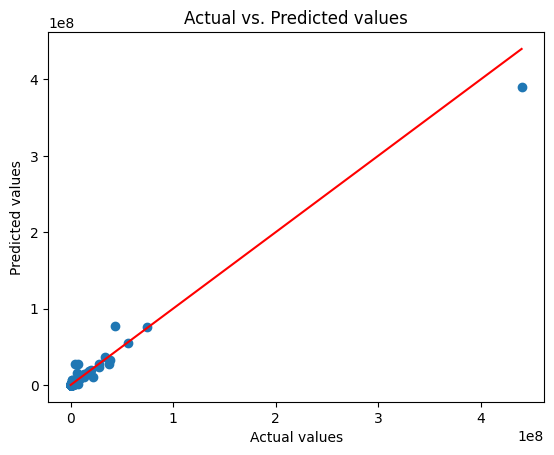

In [41]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  
plt.show()
